# **STEP 1 : DATA LOADING AND UNDERSTAND THE PROBLEM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('heart_disease.csv')

In [22]:
df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [23]:
df.shape

(10000, 21)

# **STEP 2:Check the type of data in each col**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [25]:
df.describe() #only for numerical cols

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [49]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

print("Numerical Features:")
for col in numerical_features:
    print("-", col)


Numerical Features:
- Age
- Blood Pressure
- Cholesterol Level
- BMI
- Sleep Hours
- Triglyceride Level
- Fasting Blood Sugar
- CRP Level
- Homocysteine Level


In [27]:
categorical_features = df.select_dtypes(include=["object", "category"]).columns

print("\nCategorical Features:")
for col in categorical_features:
    print("-", col)



Categorical Features:
- Gender
- Exercise Habits
- Smoking
- Family Heart Disease
- Diabetes
- High Blood Pressure
- Low HDL Cholesterol
- High LDL Cholesterol
- Alcohol Consumption
- Stress Level
- Sugar Consumption
- Heart Disease Status


# **Observations**
    -The dataset contain 21 cols and about 10k records.
    
    -consisting of both categorical and numerical feature


Numerical Features:
- Age
- Blood Pressure
- Cholesterol Level
- BMI
- Sleep Hours
- Triglyceride Level
- Fasting Blood Sugar
- CRP Level
- Homocysteine Level

Categorical Features:
- Gender
- Exercise Habits
- Smoking
- Family Heart Disease
- Diabetes
- High Blood Pressure
- Low HDL Cholesterol
- High LDL Cholesterol
- Alcohol Consumption
- Stress Level
- Sugar Consumption
- Heart Disease Status




---


> IMPORTANT:
 by seeing the dataset it's clear that it is a classic binary classification problem

# **what to do now?**



> we need to prepare the dataset so that it can be feed to an algo which can classify if the person is having or may have a heart disease is the future


---


**How to do that?**



1.Define the target variable

> Decide what you want to predict
 ( Heart Disease Status)


2.Data preprocessing


> we will see it how to do it in later sections





# **SETP 1:Handle missing values**

In [29]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [36]:
print(df.duplicated().sum())


0


In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [50]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

iter_imputer = IterativeImputer(random_state=42)
df[num_cols] = iter_imputer.fit_transform(df[num_cols])

In [51]:
print(df[num_cols].isnull().sum())

Age                    0
Blood Pressure         0
Cholesterol Level      0
BMI                    0
Sleep Hours            0
Triglyceride Level     0
Fasting Blood Sugar    0
CRP Level              0
Homocysteine Level     0
dtype: int64


## **Why IterativeImputer?**

**First understand how it work**

> Uses correlations between all features → more realistic imputation



- Predict the missing values using other features as input

- Uses a regression model (by default, BayesianRidge)

- Only uses rows where this feature is not missing to train the model

**Why it is better than using simple mean or meadian?**

- Suppose Blood Pressure (BP) is correlated with Age.

- Median imputation fills same value for everyone → ignores age influence

- High BP in older people and low BP in younger people → pattern is lost



>NOTE: Although its complex and slower but leads to more accurate results



In [52]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Columns with small missing
small_missing_cat = [col for col in cat_cols if col != "Alcohol Consumption"]


for col in small_missing_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df[small_missing_cat].isnull().sum())


Gender                  0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Stress Level            0
Sugar Consumption       0
Heart Disease Status    0
dtype: int64


## Alcohol Consumption is a special case because of the huge missing values about >80%


**whats the option for now?**


> lets treat it as **unknown** category

**why so?**



> Prevents skewing dataset with majority value.


>Can lead to biasness/imbalance in the dataset











In [53]:
X["Alcohol Consumption"] = X["Alcohol Consumption"].fillna("Unknown")


#**STEP 2:Encoding**

In [60]:
binary_cols = ["Gender", "Smoking", "Diabetes", "Family Heart Disease",
               "High Blood Pressure", "Low HDL Cholesterol", "High LDL Cholesterol"]

for col in binary_cols:
    df[col] = df[col].map({"Yes":1, "No":0}) if df[col].dtype=='object' else df[col]


df["Heart Disease Status"] = df["Heart Disease Status"].map({"Yes":1, "No":0})


In [55]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ["Exercise Habits", "Stress Level", "Sugar Consumption"]
exercise_order = ["Low", "Medium", "High"]
stress_order = ["Low", "Medium", "High"]
sugar_order = ["Low", "Medium", "High"]

ordinal_enc = OrdinalEncoder(categories=[exercise_order, stress_order, sugar_order])
df[ordinal_cols] = ordinal_enc.fit_transform(df[ordinal_cols])



## **Why ordinal encoding?**


> if we had use OHE then model would not know that High > Medium > Low



> Ordinal Encoding preserves this order by assigning numbers based on ranking.




*  low:0
*  medium:1


*  High :2









       





In [56]:
df = pd.get_dummies(df, columns=["Alcohol Consumption"], drop_first=True)


In [57]:
df["Alcohol Consumption_Low"] = df["Alcohol Consumption_Low"].astype(int)
df["Alcohol Consumption_Medium"] = df["Alcohol Consumption_Medium"].astype(int)


In [58]:
df.head(2)



,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,Alcohol Consumption_Low,Alcohol Consumption_Medium
0,56.0,1,153.0,155.0,2.0,1,1,0,24.991591,1,...,1.0,7.633228,1.0,342.0,120.22052,12.969246,12.387250,No,0,0
1,69.0,0,146.0,286.0,2.0,0,1,1,25.221799,0,...,2.0,8.744034,1.0,133.0,157.00000,9.355389,19.298875,No,0,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10000 non-null  float64
 1   Gender                      10000 non-null  int64  
 2   Blood Pressure              10000 non-null  float64
 3   Cholesterol Level           10000 non-null  float64
 4   Exercise Habits             10000 non-null  float64
 5   Smoking                     10000 non-null  int64  
 6   Family Heart Disease        10000 non-null  int64  
 7   Diabetes                    10000 non-null  int64  
 8   BMI                         10000 non-null  float64
 9   High Blood Pressure         10000 non-null  int64  
 10  Low HDL Cholesterol         10000 non-null  int64  
 11  High LDL Cholesterol        10000 non-null  int64  
 12  Stress Level                10000 non-null  float64
 13  Sleep Hours                 1000

In [45]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


# **STEP 3: Feature Engineering**

In [62]:
df['BMI_Age'] = df['BMI'] * df['Age']
df['BP_Cholesterol'] = df['Blood Pressure'] * df['Cholesterol Level']

In [88]:
df['Sleep_Stress_Ratio'] = df['Sleep Hours'] / (df['Stress Level'] + 1e-5)
df['Cholesterol_Balance'] = df['Cholesterol Level'] / (df['Low HDL Cholesterol'] + 1e-5)

#1e-5 is added to avoid division by zero beacuse for this first time it got me error

In [64]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0,35,50,65,100], labels=[0,1,2,3])
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,100], labels=[0,1,2,3])

In [65]:
df['Cardio_Risk_Factors'] = df['Smoking'] + df['Diabetes'] + df['Family Heart Disease'] + df['High Blood Pressure']


In [70]:
df = df.drop(columns=['Age', 'BMI'])

In [89]:
print(df.head())

   Gender  Blood Pressure  Cholesterol Level  Exercise Habits  Smoking  \
0       1           153.0              155.0              2.0        1   
1       0           146.0              286.0              2.0        0   
2       1           126.0              216.0              0.0        0   
3       0           122.0              293.0              2.0        1   
4       1           166.0              242.0              0.0        1   

   Family Heart Disease  Diabetes  High Blood Pressure  Low HDL Cholesterol  \
0                     1         0                    1                    1   
1                     1         1                    0                    1   
2                     0         0                    0                    1   
3                     1         0                    1                    0   
4                     1         1                    1                    0   

   High LDL Cholesterol  ...  Heart Disease Status  Alcohol Consumption_Low  \
0

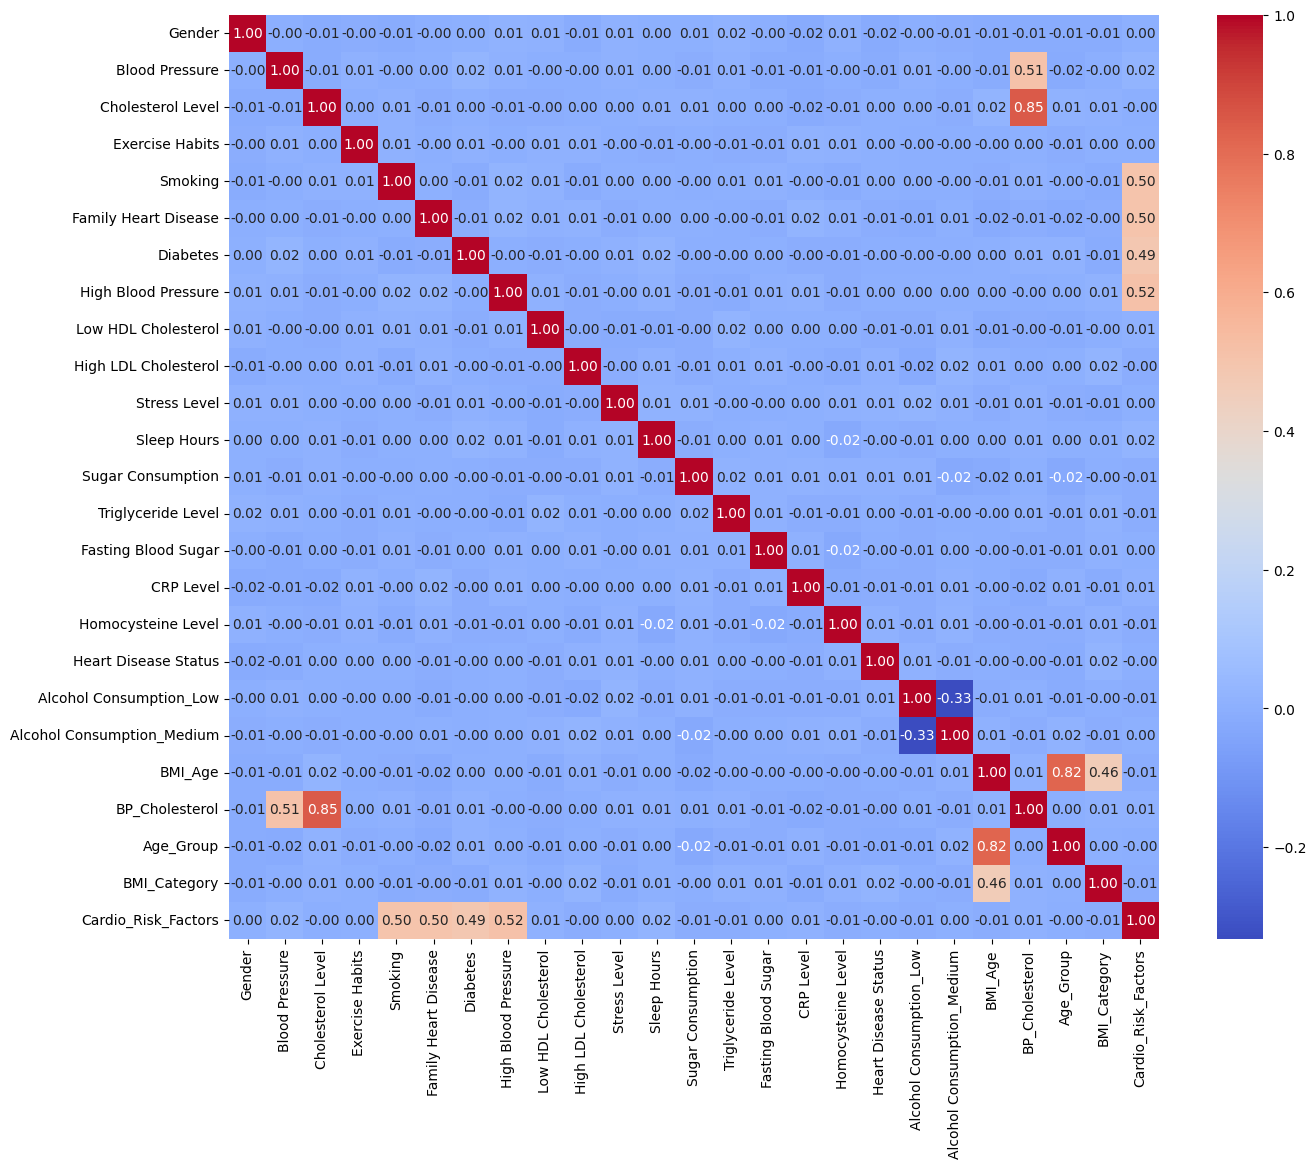

In [72]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [93]:
#  correlation with target
corr_target = df.corr()['Heart Disease Status'].sort_values(ascending=False)
print(corr_target)



Heart Disease Status          1.000000
BMI_Category                  0.020749
Stress Level                  0.011332
Homocysteine Level            0.008296
High LDL Cholesterol          0.008201
Sugar Consumption             0.007303
Cholesterol_Balance           0.007070
Alcohol Consumption_Low       0.006014
Triglyceride Level            0.002914
Cholesterol Level             0.002706
Smoking                       0.002701
High Blood Pressure           0.002200
Exercise Habits               0.001776
Fasting Blood Sugar          -0.002243
BMI_Age                      -0.002616
Cardio_Risk_Factors          -0.002640
Diabetes                     -0.002700
Sleep Hours                  -0.003812
BP_Cholesterol               -0.004741
Low HDL Cholesterol          -0.006000
CRP Level                    -0.006000
Family Heart Disease         -0.007500
Alcohol Consumption_Medium   -0.008083
Age_Group                    -0.011475
Blood Pressure               -0.013873
Gender                   

## Features aded
**BMI_Age**


> Captures interaction between age and body mass index

**BP_Cholesterol**


> combined effect of two important heart-related measures

**Age_Group and BMI_Category**



> useful for models that benefit from ordinal features


**Cardio_Risk_Factors**
> Aggregates risk factors (Smoking, Diabetes, Family Heart Disease, High BP) into one feature

**Sleep_Stress_Ratio and Cholesterol_Balance**


> Reveals hidden relationships btw both the category





# **STEP 4 :Now its time for analysis of the preprocessed data**

## **Univariate Analysis (Single Feature Analysis)**


**why?**
>  to Understand each feature individually.



**GOAL**


>  to Understand distribution, outliers, skewness for each numeric feature.







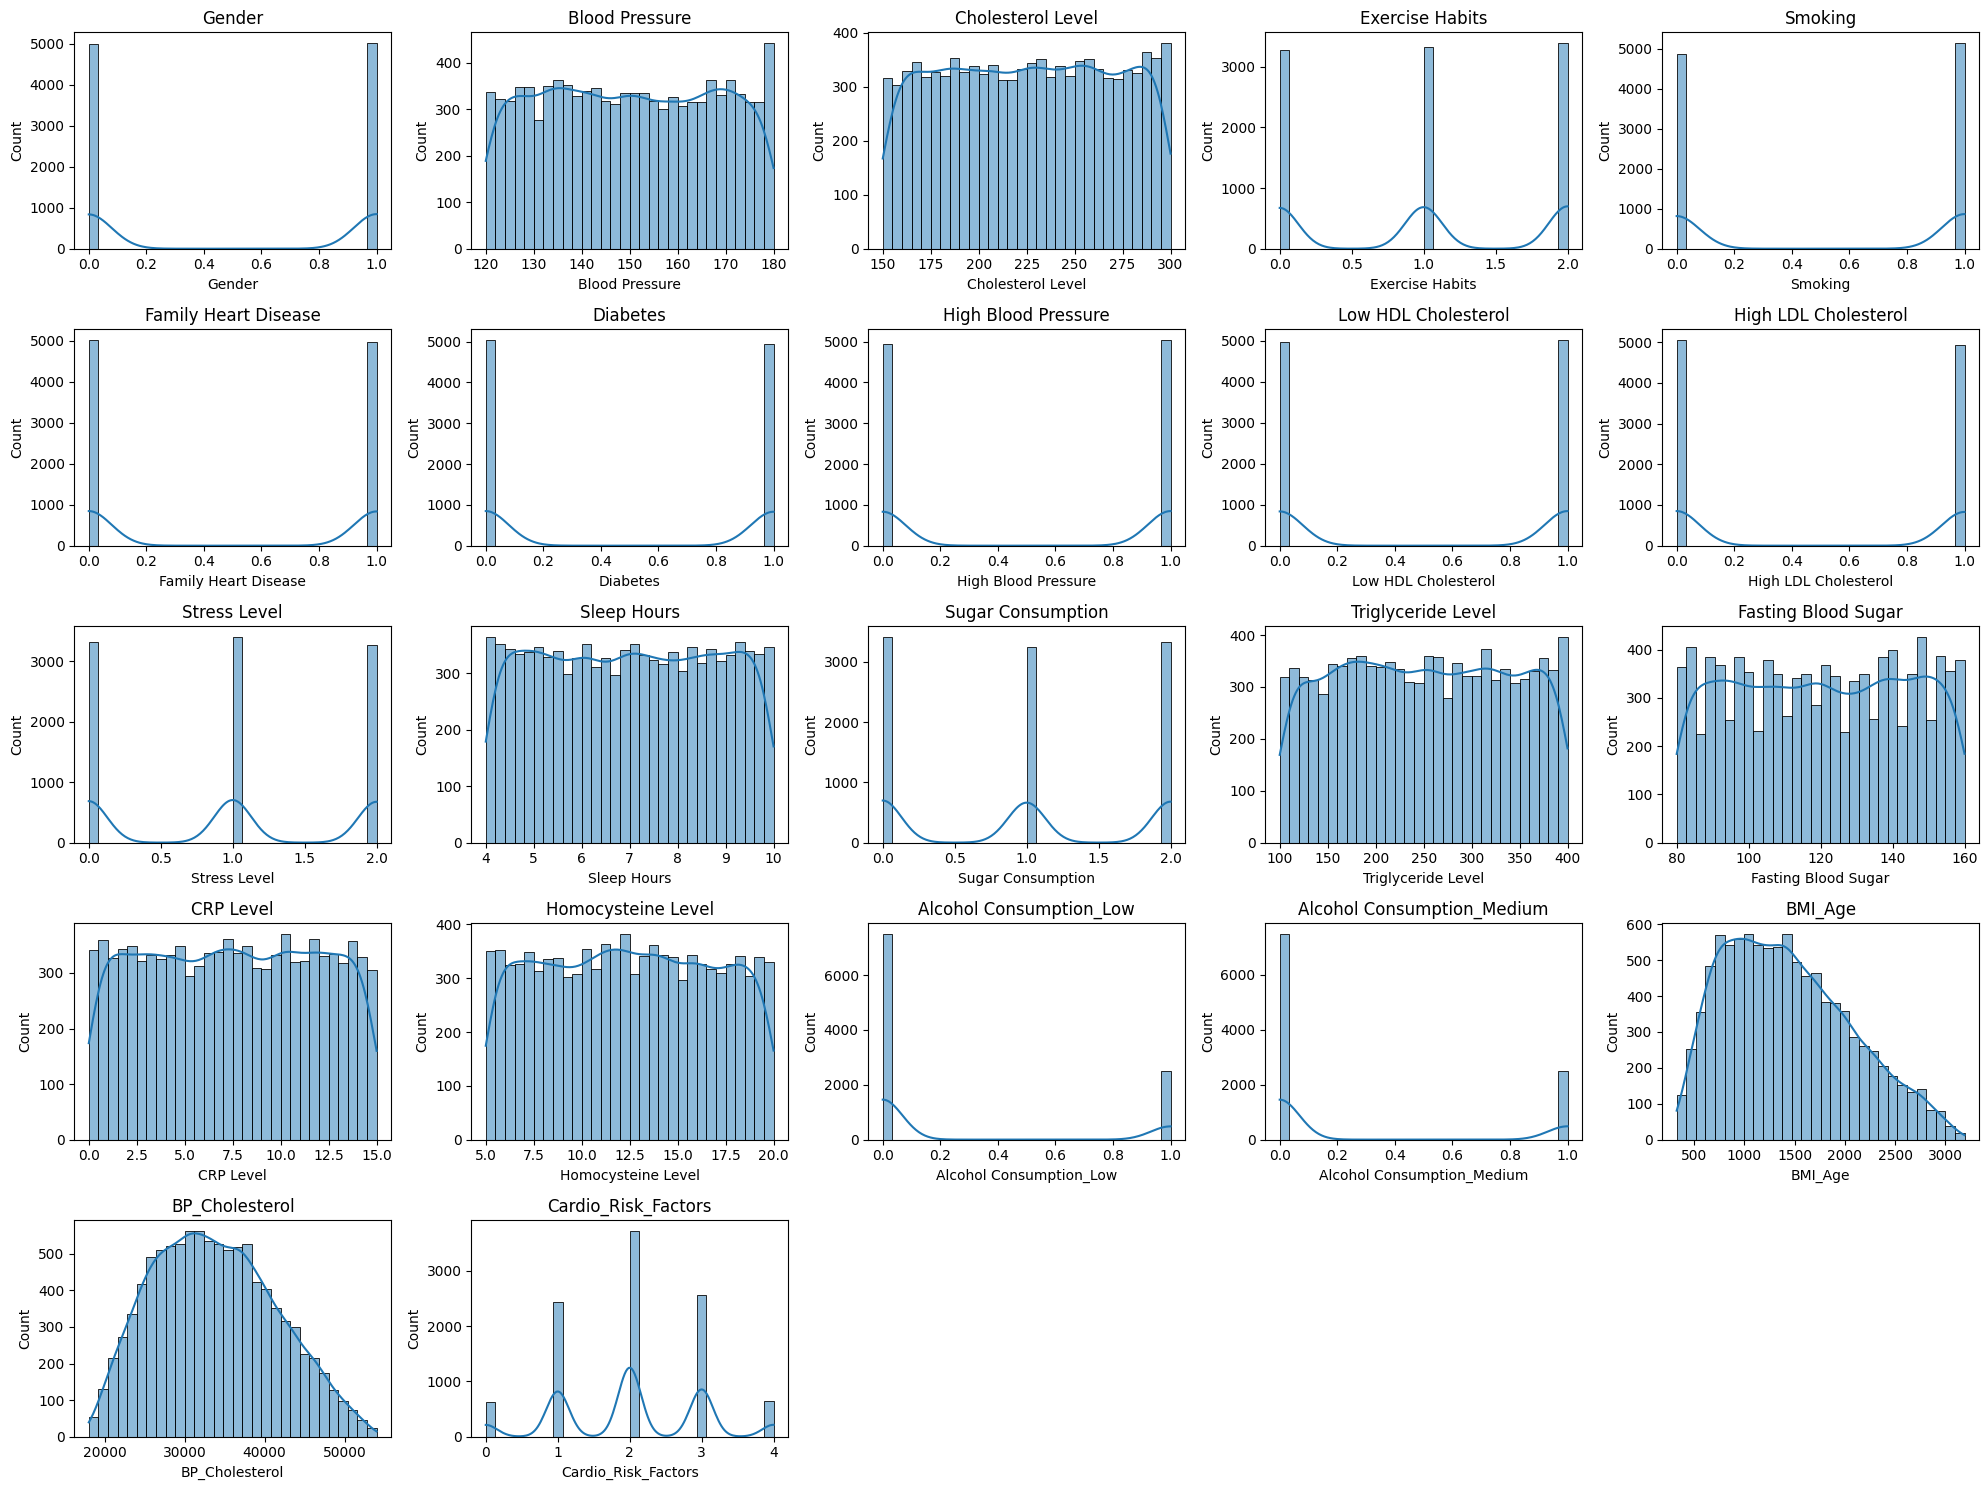

In [75]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Heart Disease Status')


plt.figure(figsize=(20,15))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 5, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


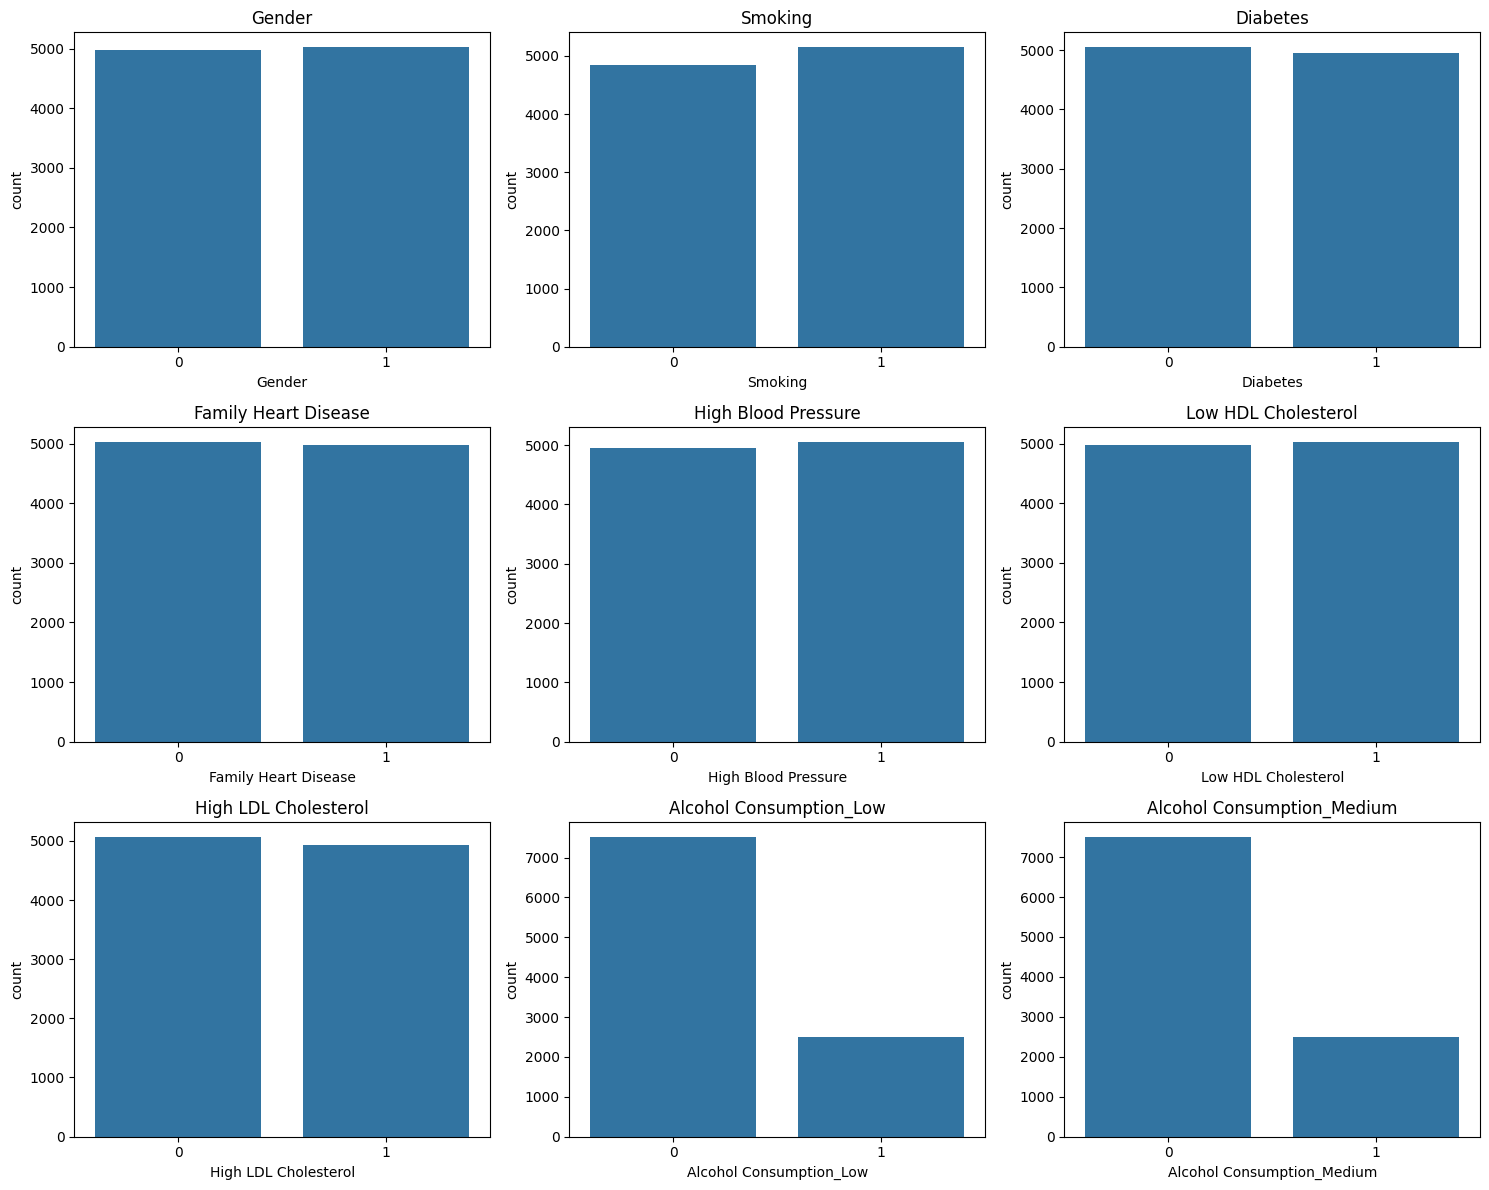

In [80]:
binary_cols = ['Gender', 'Smoking', 'Diabetes', 'Family Heart Disease',
               'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
               'Alcohol Consumption_Low', 'Alcohol Consumption_Medium']

plt.figure(figsize=(15,12))
for i, col in enumerate(binary_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Boxplots for Outlier Detection

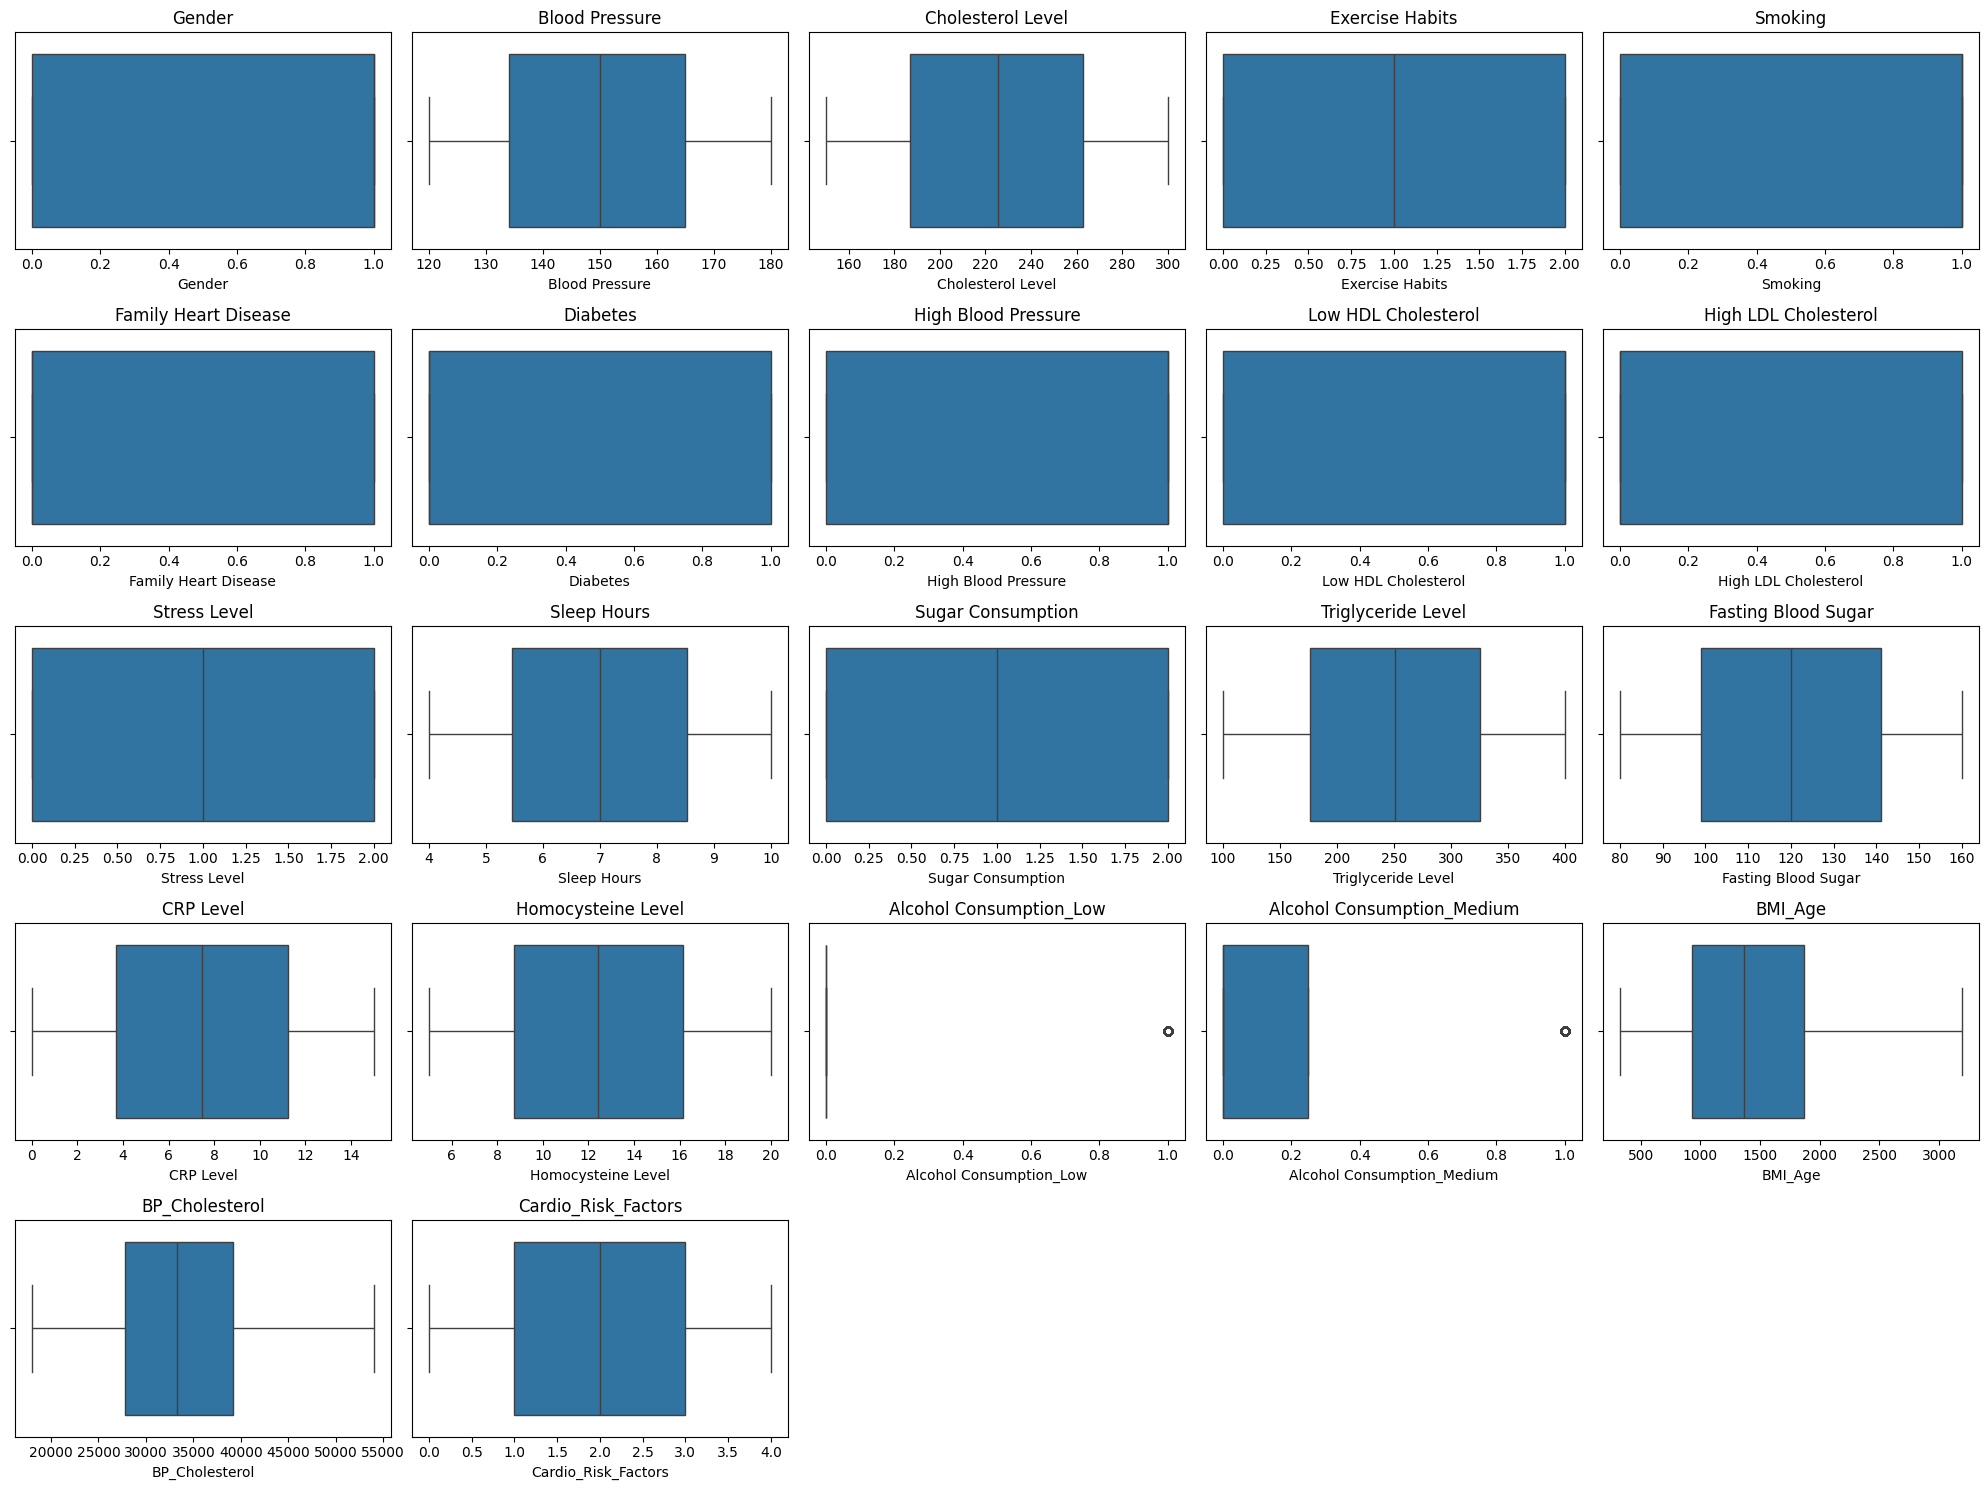

In [79]:
plt.figure(figsize=(20,15))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## **Bivariate Analysis (Feature vs Target)**

**why?**

> Check how each feature affects the target variable.



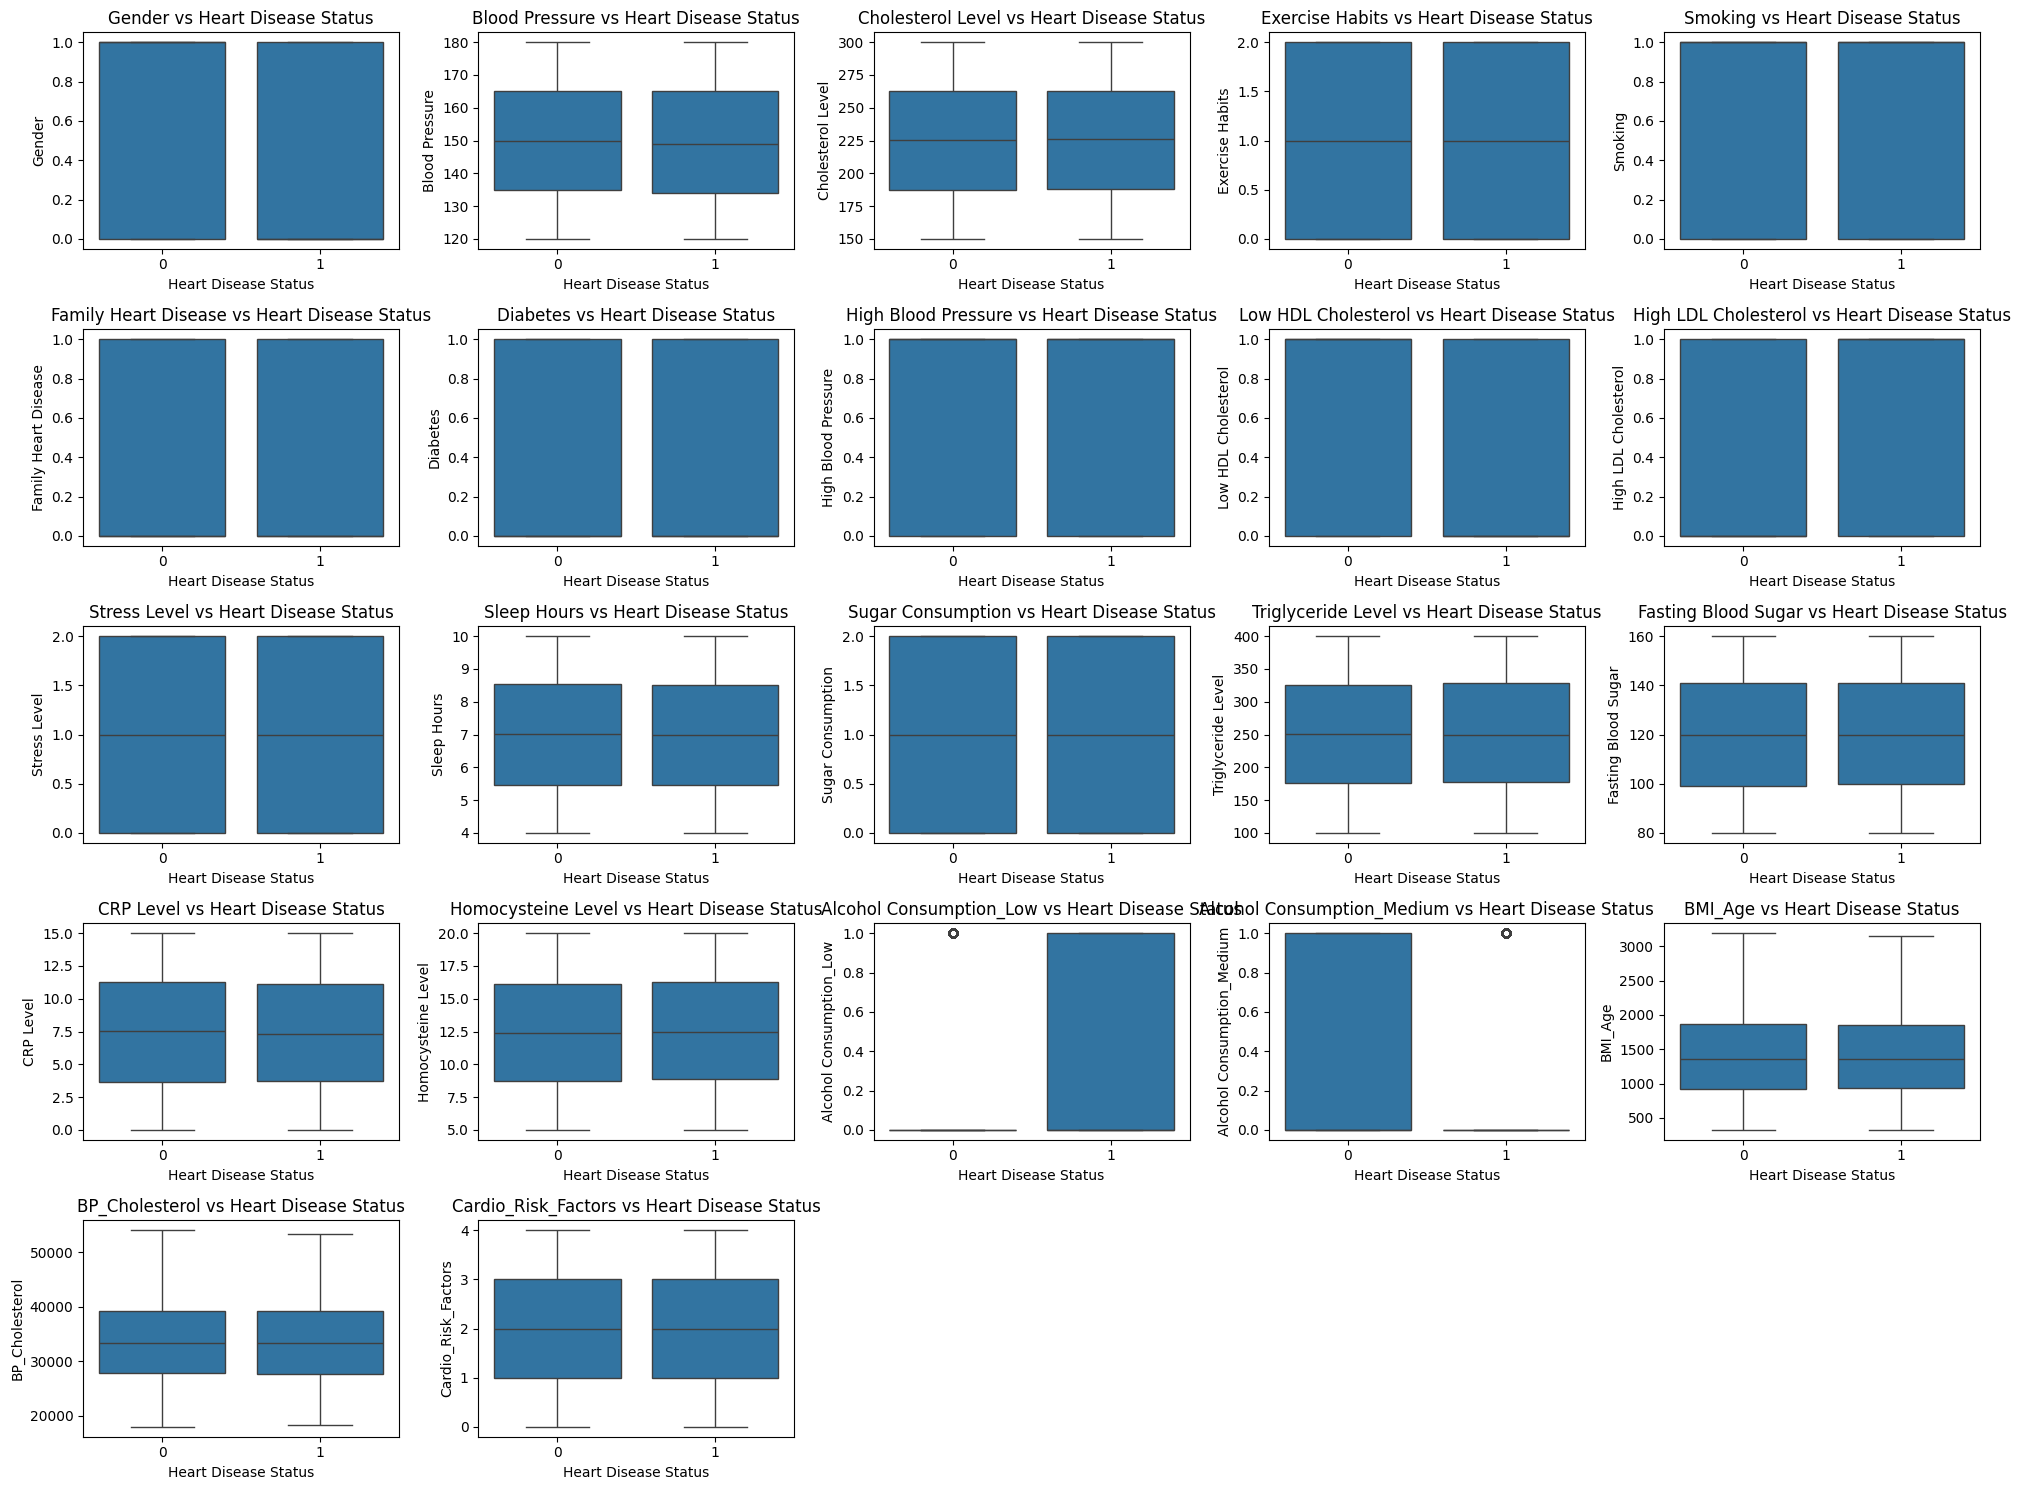

In [81]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Heart Disease Status')

plt.figure(figsize=(20,15))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x='Heart Disease Status', y=col, data=df)
    plt.title(f'{col} vs Heart Disease Status')
plt.tight_layout()
plt.show()

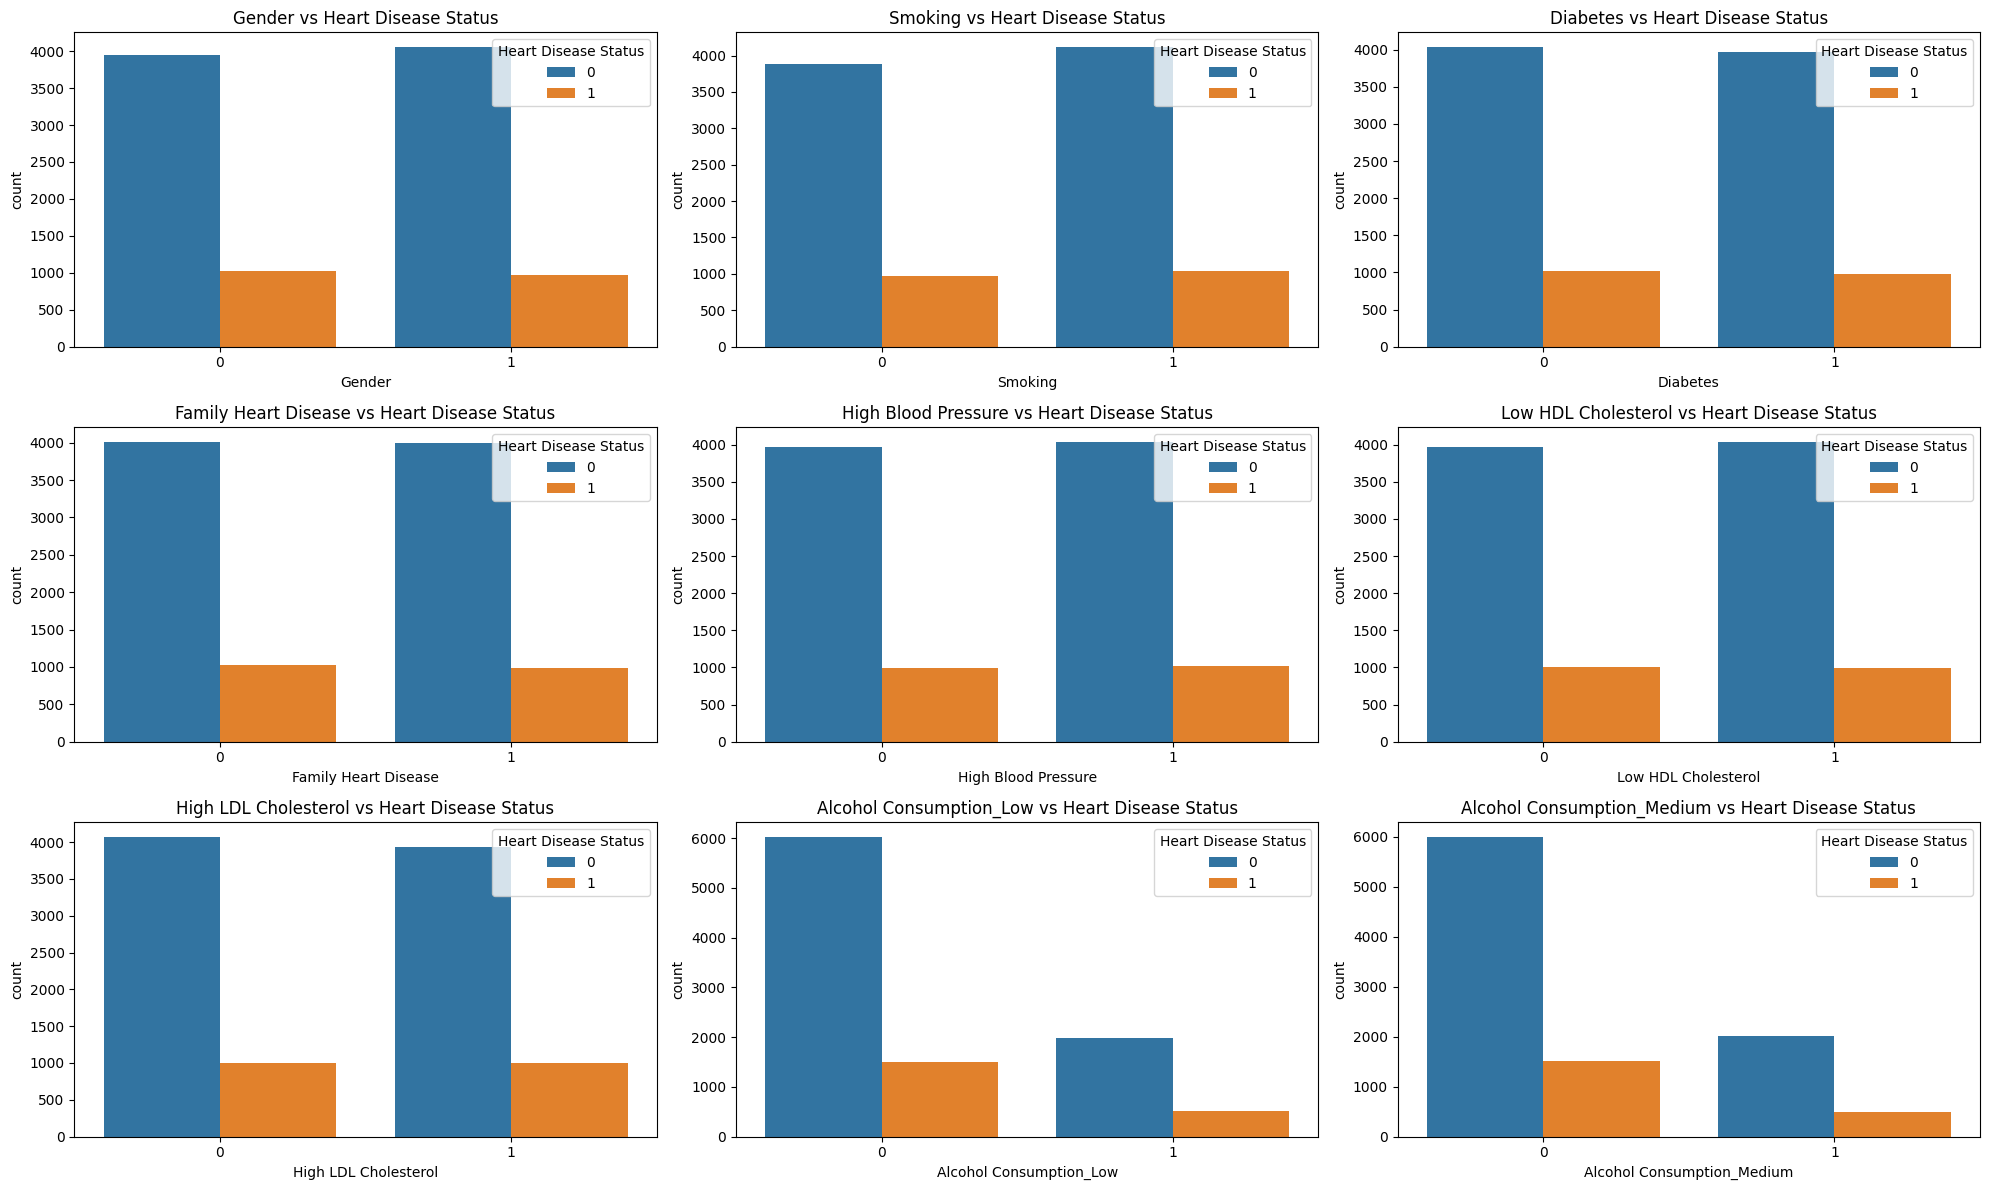

In [82]:
binary_cols = ['Gender', 'Smoking', 'Diabetes', 'Family Heart Disease',
               'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
               'Alcohol Consumption_Low', 'Alcohol Consumption_Medium']

plt.figure(figsize=(20,12))
for i, col in enumerate(binary_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, hue='Heart Disease Status', data=df)
    plt.title(f'{col} vs Heart Disease Status')
plt.tight_layout()
plt.show()


## **Multivariate Analysis**

**why?**


> Understand relationships between features themselves.



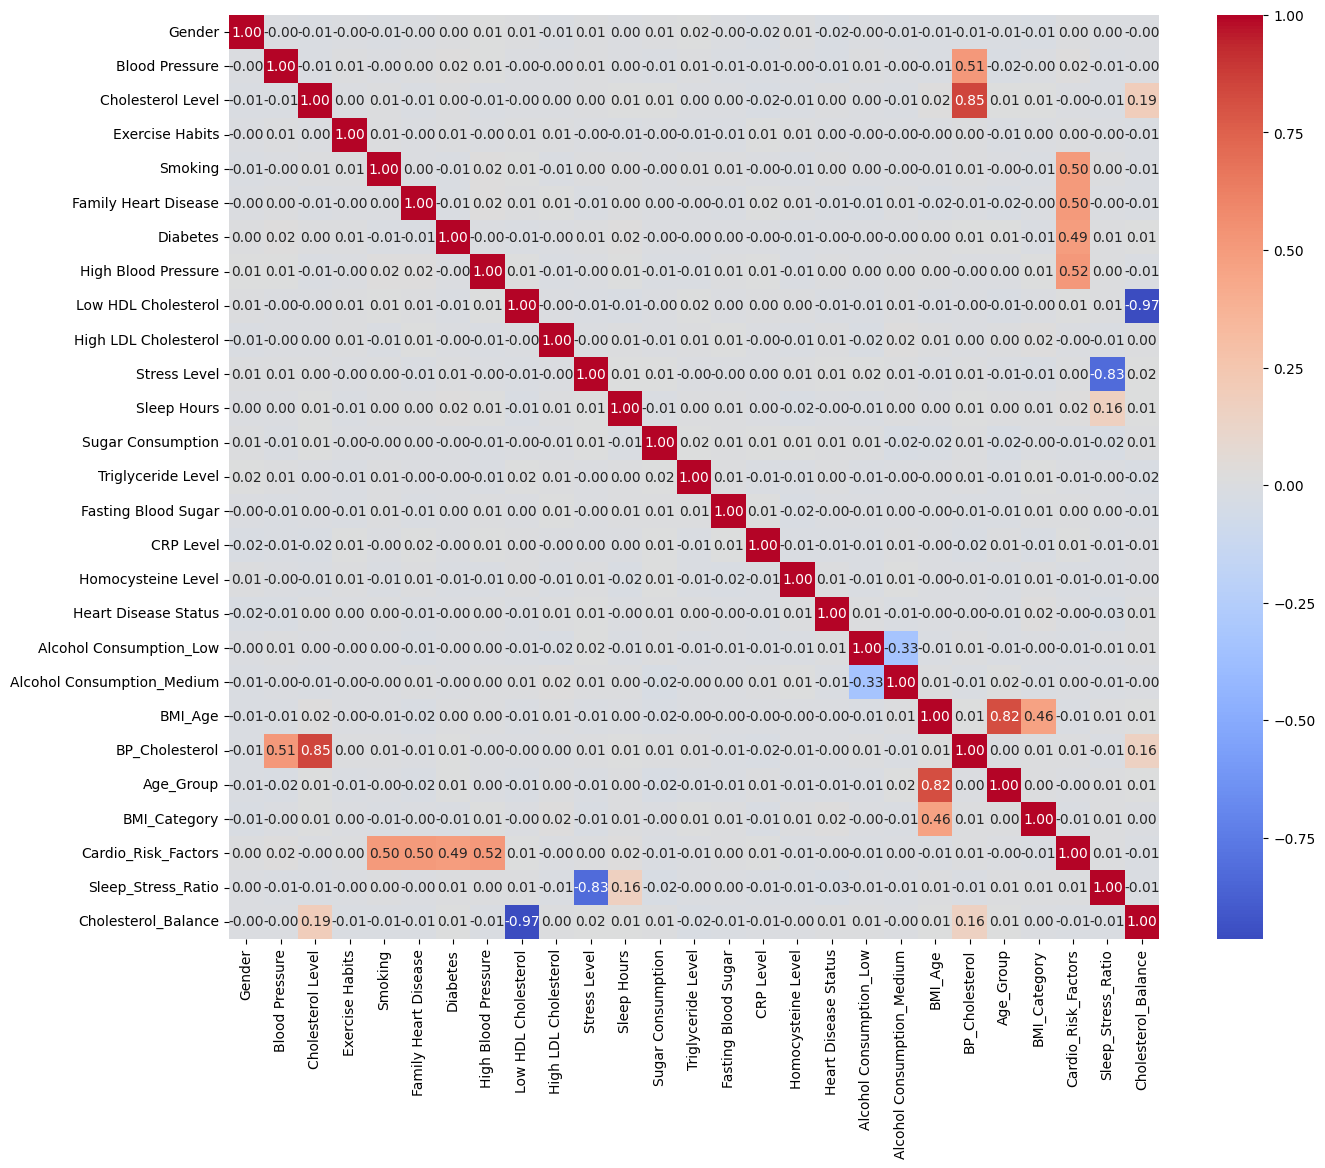

In [94]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


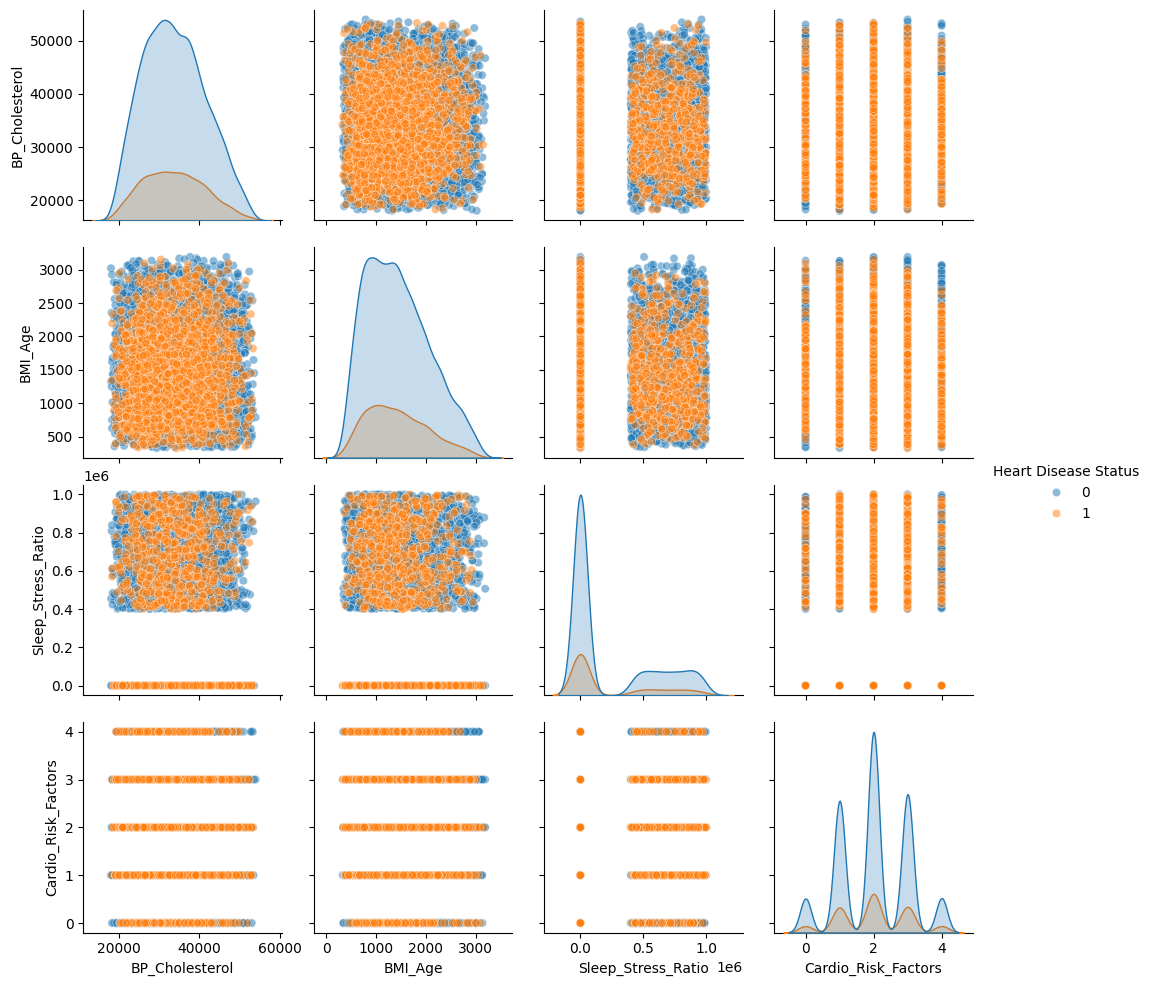

In [96]:
#  top features correlated with target
top_features = ['BP_Cholesterol', 'BMI_Age', 'Sleep_Stress_Ratio', 'Cardio_Risk_Factors']

sns.pairplot(df[top_features + ['Heart Disease Status']],
             hue='Heart Disease Status', diag_kind='kde',
             plot_kws={'alpha':0.5})
plt.show()


# **Observation of analysis**


**Univariate Analysis**
> there is no visible outliers



>  Alcohol Consumption_Medium is skewed/imbalanced

**Bivariate Analysis**


> Some features show separation in distributions:BP_Cholesterol,BMI_Age, Chol_HDL_Ratio, Cardio_Risk_Factors

> Others like Sleep Hours, Fasting Blood Sugar, CRP Level → minor differences

**Multivariate Analysis**
>Highly correlated features identified:BMI_age

>BP_Cholesterol and Blood Pressure → moderate correlation

>Most features are not strongly correlated, so multicollinearity is minimal
